In [2]:
from itertools import combinations_with_replacement, chain
import numpy as np
from matplotlib import pyplot as plt

In the next cell I define all the mass shifts of amino acids and their modificiations we will look for that have potential mass isobaricity.

In [3]:
amino_acid_masses = {
    # Standard amino acids
    "A": 71.03711,
    "R": 156.10111,
    "N": 114.04293,
    "D": 115.02694,
    "C": 103.00919,
    "E": 129.04259,
    "Q": 128.05858,
    "G": 57.02146,
    "H": 137.05891,
    "I": 113.08406,
    "L": 113.08406,
    "K": 128.09496,
    "M": 131.04049,
    "F": 147.06841,
    "P": 97.05276,
    "S": 87.03203,
    "T": 101.04768,
    "W": 186.07931,
    "Y": 163.06333,
    "V": 99.06841,

    # Modified residues (accurate total masses)
    "C[Carbamidomethyl]": 160.03065,     # 103.00919 + 57.02146
    "M[Oxidation]": 147.03540,           # 131.04049 + 15.99491
    "H[Oxidation]": 153.05382,           # 137.05891 + 15.99491
    "Q[Pyro-glu]": 111.03203,            # 128.05858 − 17.02655
    "E[Pyro-glu]": 111.03203,            # 129.04259 − 18.01056
    "W[Oxidation]": 202.07422,           # 186.07931 + 15.99491
    "N[Deamidated]": 115.02695,          # 114.04293 + 0.98402
    "Q[Deamidated]": 129.04260,          # 128.05858 + 0.98402
    "S[Phospho]": 166.99836,             # 87.03203 + 79.96633
    "T[Phospho]": 181.01398,             # 101.04768 + 79.96633
    "Y[Phospho]": 243.02966,             # 163.06333 + 79.96633
    "K[Acetyl]": 170.10552,              # 128.09496 + 42.01056
    "K[Methyl]": 142.11061,              # 128.09496 + 14.01565
    "K[Dimethyl]": 156.12626,            # 128.09496 + 28.03130
    "K[Trimethyl]": 170.14191,           # 128.09496 + 42.04695
    "K[Propionyl]": 185.11642,           # 128.09496 + 57.02146
    "K[Butyryl]": 199.13031,             # 128.09496 + 71.03535
    "K[Formyl]": 156.10572,              # 128.09496 + 28.01076
    "K[Malonyl]": 186.11146,             # 128.09496 + 58.01650
    "K[Succinyl]": 200.12535,            # 128.09496 + 72.03039
    "R[Methyl]": 170.11676,              # 156.10111 + 14.01565
    "R[Dimethyl]": 184.13241,            # 156.10111 + 28.03130
    "R[Trimethyl]": 198.14806,           # 156.10111 + 42.04695
}


In the next cell I calculate all combinations of isobars for a given peptide length.

In [12]:
# Function to calculate the total mass of a combination
def calculate_mass(combination):
    return sum(amino_acid_masses[aa] for aa in combination)

overlap_list = []
max_length_isobar = 3
# Group masses within a tolerance of 0.025
tolerance = 0.02 # TOF
#tolerance = 0.005  # Orbitrap


for i in range(20,len(amino_acid_masses.keys())):
    # Generate all combinations for lengths 1, 2, and 3
    all_combinations = []
    for r in range(1, max_length_isobar+1):  # Lengths 1 to 3
        combinations_r = combinations_with_replacement(list(amino_acid_masses.keys())[0:i], r)
        all_combinations.extend(combinations_r)

    # Calculate masses and store combination details
    mass_details = {}
    for comb in all_combinations:
        mass = round(calculate_mass(comb), 5)  # Round to handle floating-point arithmetic
        peptide_name = "".join(comb)
        if mass not in mass_details:
            mass_details[mass] = []
        mass_details[mass].append(peptide_name)

    sorted_masses = sorted(mass_details.keys())
    grouped_masses = []
    current_group = [(sorted_masses[0], mass_details[sorted_masses[0]])]

    for mass in sorted_masses[1:]:
        if mass - current_group[-1][0] <= tolerance:
            current_group.append((mass, mass_details[mass]))
        else:
            if len(current_group) > 1:
                grouped_masses.append(current_group)
            current_group = [(mass, mass_details[mass])]

    # Add the last group if it wasn't added
    if len(current_group) > 1:
        grouped_masses.append(current_group)

    # Output the result
    print(i,f"Number of overlapping mass groups: {len(grouped_masses)}")
    possibilities_list = []
    for gm_count in grouped_masses:
        tot_possibilities = 0
        for sub_gm in gm_count:
            tot_possibilities += len(sub_gm[1])
        possibilities_list.append(tot_possibilities)

    overlap_list.append(
        [i, len(grouped_masses) - i, np.mean(possibilities_list), np.percentile(possibilities_list,10), np.percentile(possibilities_list,90)]
    )

    #if i == 35:
    for gm in grouped_masses:
        if abs(gm[0][0] - 229.0831) < 0.05:
            print(gm)
        #    print("Example of overlapping masses in one group:", gm)

modification_count_tof = [ol[0] for ol in overlap_list]
group_count_tof = [ol[1] for ol in overlap_list]
group_size_count_tof = [ol[2] for ol in overlap_list]
group_size_count_tof_10 = [ol[3] for ol in overlap_list]
group_size_count_tof_90 = [ol[4] for ol in overlap_list]

20 Number of overlapping mass groups: 261
[(229.06986, ['DGG']), (229.06987, ['ND'])]
[(229.10625, ['AAS', 'AGT']), (229.10626, ['QT'])]
21 Number of overlapping mass groups: 299
[(229.06986, ['DGG']), (229.06987, ['ND'])]
[(229.10625, ['AAS', 'AGT']), (229.10626, ['QT'])]
22 Number of overlapping mass groups: 327
[(229.06986, ['DGG']), (229.06987, ['ND'])]
[(229.10625, ['AAS', 'AGT']), (229.10626, ['QT'])]
23 Number of overlapping mass groups: 357
[(229.06986, ['DGG']), (229.06987, ['ND'])]
[(229.10625, ['AAS', 'AGT']), (229.10626, ['QT'])]
24 Number of overlapping mass groups: 375
[(229.06986, ['DGG']), (229.06987, ['ND'])]
[(229.10625, ['AAS', 'AGT']), (229.10626, ['QT'])]
25 Number of overlapping mass groups: 375
[(229.06986, ['DGG']), (229.06987, ['ND'])]
[(229.10625, ['AAS', 'AGT']), (229.10626, ['QT'])]
26 Number of overlapping mass groups: 398
[(229.06986, ['DGG']), (229.06987, ['ND'])]
[(229.10625, ['AAS', 'AGT']), (229.10626, ['QT'])]
27 Number of overlapping mass groups: 423

Perform exactly the same analysis as above, now for the orbitrap mass analyzer.

In [86]:
# Function to calculate the total mass of a combination
def calculate_mass(combination):
    return sum(amino_acid_masses[aa] for aa in combination)


overlap_list = []
# Group masses within a tolerance of 0.025
# tolerance = 0.02 # TOF
tolerance = 0.005  # Orbitrap

for i in range(20, len(amino_acid_masses.keys())):
    # Generate all combinations for lengths 1, 2, and 3
    all_combinations = []
    for r in range(1, 4):  # Lengths 1 to 3
        combinations_r = combinations_with_replacement(
            list(amino_acid_masses.keys())[0:i], r
        )
        all_combinations.extend(combinations_r)

    # Calculate masses and store combination details
    mass_details = {}
    for comb in all_combinations:
        mass = round(
            calculate_mass(comb), 5
        )  # Round to handle floating-point arithmetic
        peptide_name = "".join(comb)
        if mass not in mass_details:
            mass_details[mass] = []
        mass_details[mass].append(peptide_name)

    sorted_masses = sorted(mass_details.keys())
    grouped_masses = []
    current_group = [(sorted_masses[0], mass_details[sorted_masses[0]])]

    for mass in sorted_masses[1:]:
        if mass - current_group[-1][0] <= tolerance:
            current_group.append((mass, mass_details[mass]))
        else:
            if len(current_group) > 1:
                grouped_masses.append(current_group)
            current_group = [(mass, mass_details[mass])]

    # Add the last group if it wasn't added
    if len(current_group) > 1:
        grouped_masses.append(current_group)

    # Output the result
    print(i, f"Number of overlapping mass groups: {len(grouped_masses)}")
    possibilities_list = []
    for gm_count in grouped_masses:
        tot_possibilities = 0
        for sub_gm in gm_count:
            tot_possibilities += len(sub_gm[1])
        possibilities_list.append(tot_possibilities)
    overlap_list.append([i, len(grouped_masses) - i, np.mean(possibilities_list), np.percentile(possibilities_list,10), np.percentile(possibilities_list,90)])

modification_count_orbi = [ol[0] for ol in overlap_list]
group_count_orbi = [ol[1] for ol in overlap_list]
group_size_count_orbi = [ol[2] for ol in overlap_list]
group_size_count_orbi_10 = [ol[3] for ol in overlap_list]
group_size_count_orbi_90 = [ol[4] for ol in overlap_list]


20 Number of overlapping mass groups: 152
21 Number of overlapping mass groups: 214
22 Number of overlapping mass groups: 297
23 Number of overlapping mass groups: 357
24 Number of overlapping mass groups: 431
25 Number of overlapping mass groups: 431
26 Number of overlapping mass groups: 479
27 Number of overlapping mass groups: 640
28 Number of overlapping mass groups: 740
29 Number of overlapping mass groups: 814
30 Number of overlapping mass groups: 914
31 Number of overlapping mass groups: 1005
32 Number of overlapping mass groups: 1104
33 Number of overlapping mass groups: 1167
34 Number of overlapping mass groups: 1243
35 Number of overlapping mass groups: 1317
36 Number of overlapping mass groups: 1431
37 Number of overlapping mass groups: 1586
38 Number of overlapping mass groups: 1811
39 Number of overlapping mass groups: 1888
40 Number of overlapping mass groups: 2008
41 Number of overlapping mass groups: 2062
42 Number of overlapping mass groups: 2154


# Plotting

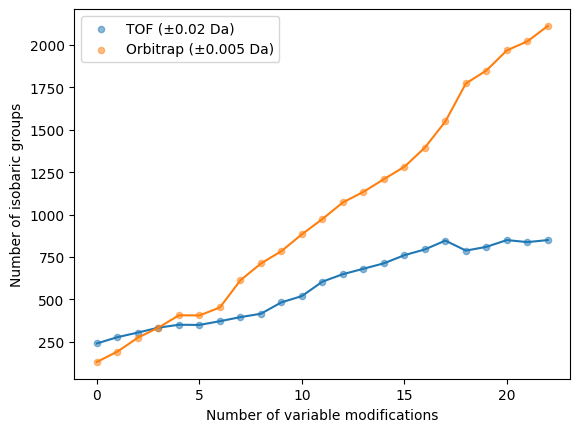

In [87]:
plt.scatter(
    np.array(modification_count_tof)-20,
    group_count_tof,
    s=20,
    alpha=0.5,
    label="TOF (±0.02 Da)",
)

plt.scatter(
    np.array(modification_count_orbi)-20,
    group_count_orbi,
    s=20,
    alpha=0.5,
    label="Orbitrap (±0.005 Da)",
)
plt.xlabel("Number of variable modifications")
plt.ylabel("Number of isobaric groups")
plt.plot(np.array(modification_count_tof)-20, group_count_tof)
plt.plot(np.array(modification_count_orbi)-20, group_count_orbi)
plt.legend()

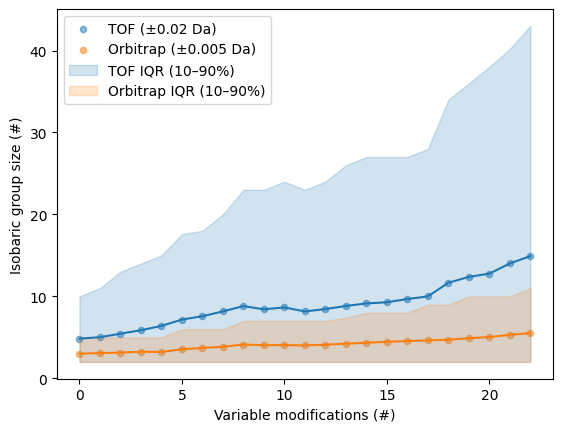

In [90]:
plt.scatter(
    np.array(modification_count_tof)-20,
    group_size_count_tof,
    s=20,
    alpha=0.5,
    label="TOF (±0.02 Da)",
)
plt.scatter(
    np.array(modification_count_orbi)-20,
    group_size_count_orbi,
    s=20,
    alpha=0.5,
    label="Orbitrap (±0.005 Da)",
)
plt.xlabel("Variable modifications (#)")
plt.ylabel("Isobaric group size (#)")

plt.plot(np.array(modification_count_tof)-20, group_size_count_tof)
plt.fill_between(
    np.array(modification_count_tof)-20,
    group_size_count_tof_10,
    group_size_count_tof_90,
    color="C0",
    alpha=0.2,
    label="TOF IQR (10–90%)"
)

plt.plot(np.array(modification_count_orbi)-20, group_size_count_orbi)
plt.fill_between(
    np.array(modification_count_orbi)-20,
    group_size_count_orbi_10,
    group_size_count_orbi_90,
    color="C1",
    alpha=0.2,
    label="Orbitrap IQR (10–90%)"
)
plt.legend()

plt.savefig("isobaric_group_size.png",dpi=300)

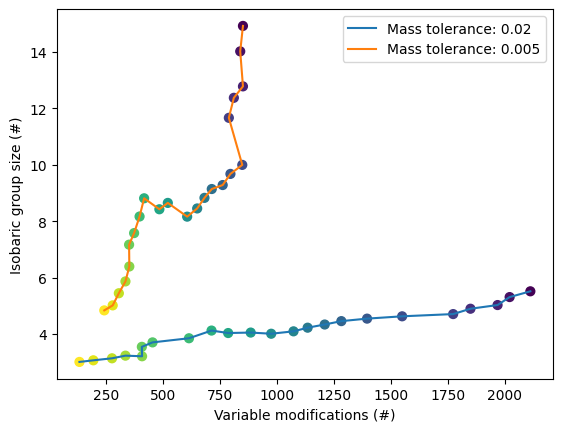

In [89]:
plt.plot(group_count_orbi,
    group_size_count_orbi,
        label="Mass tolerance: 0.02")

plt.plot(group_count_tof,
    group_size_count_tof,
        label="Mass tolerance: 0.005")

plt.scatter(
    group_count_tof,
    group_size_count_tof,
    c=modification_count_tof,
    cmap='viridis_r',
    s=40,
)

plt.scatter(
    group_count_orbi,
    group_size_count_orbi,
    c=modification_count_orbi,
    cmap='viridis_r',
    s=40
)
plt.xlabel("Variable modifications (#)")
plt.ylabel("Isobaric group size (#)")

plt.legend()

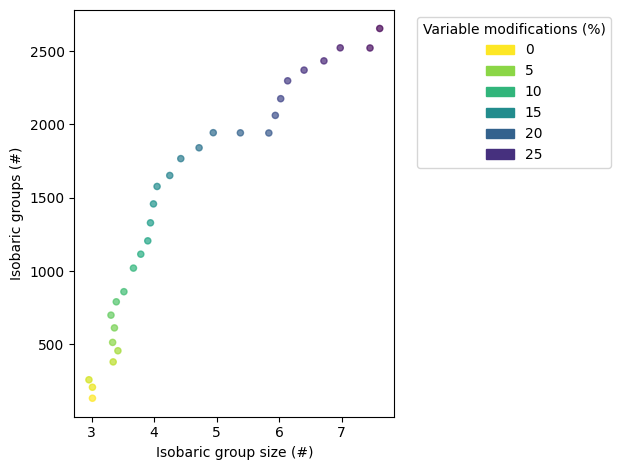

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Assuming:
# - group_count_tof, group_size_count_tof are your scatter plot coordinates
# - modification_count_orbi is a list/array of integers for coloring points

# Normalize the color values based on modification_count_orbi
cmap = plt.cm.viridis_r
norm = plt.Normalize(vmin=min(modification_count_orbi), vmax=max(modification_count_orbi))

"""
# Create scatter plot with colors from modification_count_orbi
scatter = plt.scatter(
    group_size_count_tof,
    group_count_tof,
    c=modification_count_orbi,
    cmap=cmap,
    norm=norm,
    s=20,
    alpha=0.7,
    label="Mass tolerance: 0.02"
)

"""
# Create scatter plot with colors from modification_count_orbi
scatter = plt.scatter(
    group_size_count_orbi,
    group_count_orbi,
    c=modification_count_orbi,
    cmap=cmap,
    norm=norm,
    s=20,
    alpha=0.7,
    label="Mass tolerance: 0.02"
)


plt.ylabel("Isobaric groups (#)")
plt.xlabel("Isobaric group size (#)")

# Create custom legend patches for every 5th point
indices_for_legend = range(0, len(modification_count_orbi), 5)
legend_values = [modification_count_orbi[i] for i in indices_for_legend]
legend_colors = [cmap(norm(val)) for val in legend_values]

patches = [mpatches.Patch(color=color, label=str(val-20)) for color, val in zip(legend_colors, legend_values)]

plt.legend(handles=patches, title="Variable modifications (%)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
